<a href="https://colab.research.google.com/github/keinam53/Deep_learning/blob/main/1_Wprowadzenie/5_Metryki_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Metryki - Problem klasyfikacji:
1. [Import bibliotek](#a0)
2. [Metryki - Klasyfikacja binarna](#a1)
    1. [Accuracy - dokładność klasyfikacji](#a2)
    2. [Macierz konfuzji/pomyłek](#a3)
    3. [Krzywa ROC](#a4)
3. [Metryki - Klasyfikacja wieloklasowa](#a5)   
    1. [Accuracy - dokładność klasyfikacji](#a6)
    2. [Macierz konfuzji/pomyłek](#a7)
    3. [Raport klasyfikacji](#a8)

#### <a name='a0'></a> 1. Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

#### <a name='a1'></a> 2. Metryki - Klasyfikacja binarna
#### <a name='a2'></a> 2.1 Accuracy - Dokładność klasyfikacji

####   $$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

In [2]:
y_true = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
y_pred = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [3]:
def accuracy(y_true, y_pred):
    correct = 0
    for idx, _ in enumerate(y_true):
        if y_true[idx] == y_pred[idx]:
            correct += 1
    return correct / len(y_true) * 100

accuracy(y_true, y_pred)

71.42857142857143

In [4]:
results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results = results.sort_values(by='y_true')
results['sample'] = range(1, len(results) + 1)
results.head(10)

,y_true,y_pred,sample
1,0,0,1
4,0,0,2
7,0,0,3
9,0,1,4
12,0,0,5
0,1,0,6
2,1,1,7
3,1,1,8
5,1,1,9
6,1,0,10


Text(0.5, 1.0, 'Klasyfikacja binarna - y_true')

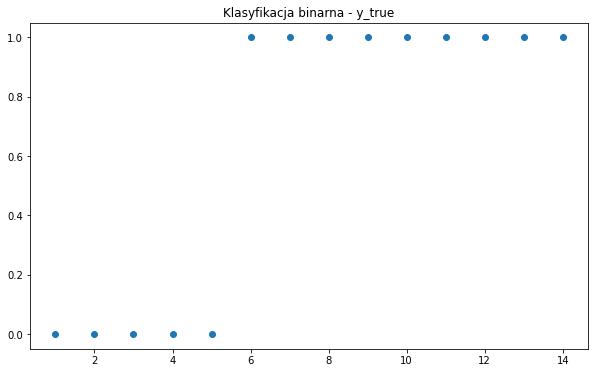

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(results['sample'], results['y_true'])
plt.title('Klasyfikacja binarna - y_true')

Text(0.5, 1.0, 'Klasyfikacja binarna - y_true')

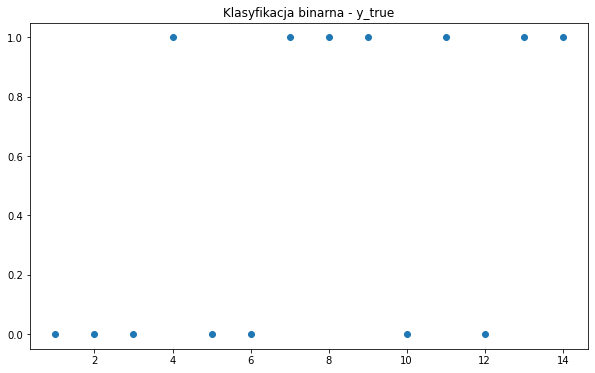

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(results['sample'], results['y_pred'])
plt.title('Klasyfikacja binarna - y_true')

#### <a name='a3'></a> 2.2 Macierz konfuzji/pomyłek

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1],
       [3, 6]])

In [8]:
import plotly.figure_factory as ff

def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(data=cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [9]:
cm_df = pd.DataFrame(data=cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])
cm_df

,pred_0,pred_1
true_1,4,1
true_0,3,6


In [10]:
tn, fp, fn, tp = cm.ravel()
print(f'TN - True Negative: {tn}')
print(f'FP - False Positive: {fp}')
print(f'FN - False Negative: {fn}')
print(f'TP - True Positive: {tp}')

TN - True Negative: 4
FP - False Positive: 1
FN - False Negative: 3
TP - True Positive: 6


In [11]:
# False Positive Rate - Type I error
fpr = fp / (fp + tn)
fpr

0.2

In [12]:
# False Negative Rate - Type II error
fnr = fn / (fn + tp)
fnr

0.3333333333333333

In [13]:
# Precision - ile obserwacji przewidywanych jako pozytywne są w rzeczywistości pozytywne
precision = tp / (tp + fp)
precision

0.8571428571428571

In [14]:
# Recall - jak wiele obserwacji z wzystkich poytywnych sklasyfikowaliśmy jako pozytywne
recall = tp / (tp + fn)
recall

0.6666666666666666

#### <a name='a4'></a> 2.3 Krzywa ROC

In [15]:
from sklearn.metrics import roc_curve

fpr, tpr, tresh = roc_curve(y_true, y_pred, pos_label=1)
roc = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
roc

,fpr,tpr
0,0.0,0.000000
1,0.2,0.666667
2,1.0,1.000000


In [16]:
def plot_roc_curve(y_true, y_pred):

    fig = go.Figure(
        data=[
            go.Scatter(x=roc['fpr'], y=roc['tpr'],
                    line_color='red',
                    name='ROC Curve'),
            go.Scatter(x=[0, 1], y=[0, 1],
                    mode='lines', 
                    line_dash='dash', 
                    line_color='navy')
        ],
        layout=go.Layout(xaxis_title='False Positive Rate',
                         yaxis_title='True Positive Rate',
                         title='ROC Curve',
                         showlegend=False,
                         width=700))
    fig.show()

plot_roc_curve(y_true, y_pred)

In [17]:
# AUC Score - pole pod krzywą
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_true, y_pred)
roc_auc

0.7333333333333333

#### <a name='a5'></a> 3. Metryki - Klasyfikacja wieloklasowa

#### <a name='a6'></a> 3.1 Accuracy - Dokładność klasyfikacji

####   $$Accuracy = \frac{correct\ predictions}{total\ predictions} * 100$$

In [19]:
from sklearn.metrics import accuracy_score

y_true = np.array([1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2])
y_pred = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2])

accuracy_score(y_true, y_pred)

0.6842105263157895

#### <a name='a7'></a> 3.2 Macierz konfuzji/pomyłek

In [20]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [3, 6, 1],
       [0, 1, 3]])

In [21]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(data=cm, columns=['pred_0', 'pred_1', 'pred_2'], index=['true_2', 'true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=400, height=400, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

#### <a name='a8'></a> 3.3 Raport klasyfikacji

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.60      0.67        10
           2       0.75      0.75      0.75         4

    accuracy                           0.68        19
   macro avg       0.69      0.72      0.69        19
weighted avg       0.70      0.68      0.68        19

